In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from sklearn.cluster import KMeans
import numpy as np
pd.set_option('display.width', 2000)

In [3]:
nucleus_df = pd.read_csv('csv/nuclei3.csv')

  Condition  CytoCh2Intensity
0    Contra          2.636358
1      Ipsi          4.361633
2      Sham          6.939222


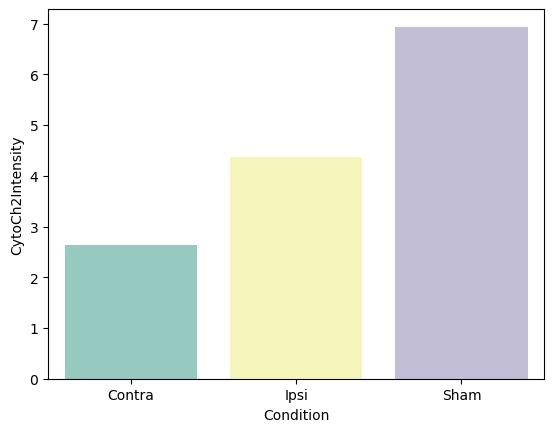

In [4]:
df = nucleus_df[nucleus_df['Location'] != 'Undefined']
mean_intensity = df.groupby('Condition')['CytoCh2Intensity'].mean().reset_index()

print(mean_intensity)

# Plotting
sns.barplot(data=mean_intensity, x='Condition', y='CytoCh2Intensity', palette='Set3')
plt.show()

In [53]:
import napari
all_sorted_clusters = []
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    list = df['CytoCh2Intensity']
    intensity_values_reshaped = np.array(list).reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
    clusters = kmeans.fit_predict(intensity_values_reshaped)
    sorted_clusters = np.argsort(kmeans.cluster_centers_.flatten())
    all_sorted_clusters.append(sorted_clusters)



common_ordering = np.argsort(np.mean(all_sorted_clusters, axis=0))

# Assign consistent cluster labels based on the common ordering
consistent_labels = {common_ordering[0]: 0, common_ordering[1]: 1}

nucleus_df['Cluster_Label'] = np.nan
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    intensity_values = df['CytoCh2Intensity'].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto", init=kmeans.cluster_centers_[common_ordering].reshape(-1, 1))
    clusters = kmeans.fit_predict(intensity_values)
    nucleus_df.loc[df.index, 'Cluster_Label'] = [consistent_labels[cluster] for cluster in clusters]

cd86_df = nucleus_df[nucleus_df['Cluster_Label'] == 1]
img1_df = cd86_df[cd86_df['ImageName'] == 'HI 2 Contralateral Mouse 9 Slide17 G4green NeuNpink CD86red 40x 4x4 technical replica2.lsm']

centroids = img1_df['Centroid'].apply(eval)

# Convert centroids to a NumPy array
centroids_array = np.array(centroids.tolist())  # Transpose the array to get the desired shape

# Check the shape of the centroids array
print(centroids_array.shape)
print(centroids_array)

from skimage import io
img= io.imread("D:/Users/Jonas/nuclei\imagesAndMasks\images_HI_contra\HI 2 Contralateral Mouse 9 Slide17 G4green NeuNpink CD86red 40x 4x4 technical replica2.lsm")

viewer = napari.view_image(img, scale =([0.9278, 0.3459, 0.3459]), channel_axis=3 )
viewer.add_points(centroids_array, size=10, symbol='cross', edge_color='blue', face_color='blue', name='Nuclei Centroids', scale=([0.9278, 0.3459, 0.3459]))
napari.run()
print(img1_df.head())
grouped_df = nucleus_df.groupby(['ImageName', 'Condition', 'Cluster_Label']).size().unstack(fill_value=0)

# Reset index to make 'ImageName', 'Condition', and 'Cluster_Label' as columns
grouped_df.reset_index(inplace=True)
print(grouped_df)


(464, 3)
[[2.54777721e+00 7.30896781e+02 2.53917067e+03]
 [3.51595092e+00 3.67582822e+02 1.76245890e+03]
 [3.14443567e+00 1.73597632e+03 3.58776559e+03]
 ...
 [4.38699690e+00 3.26296594e+03 3.20714861e+03]
 [1.38859180e+00 1.90565597e+03 2.95901783e+03]
 [9.96153846e-01 3.71616795e+03 2.35330513e+03]]


AttributeError: No napari attribute show

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


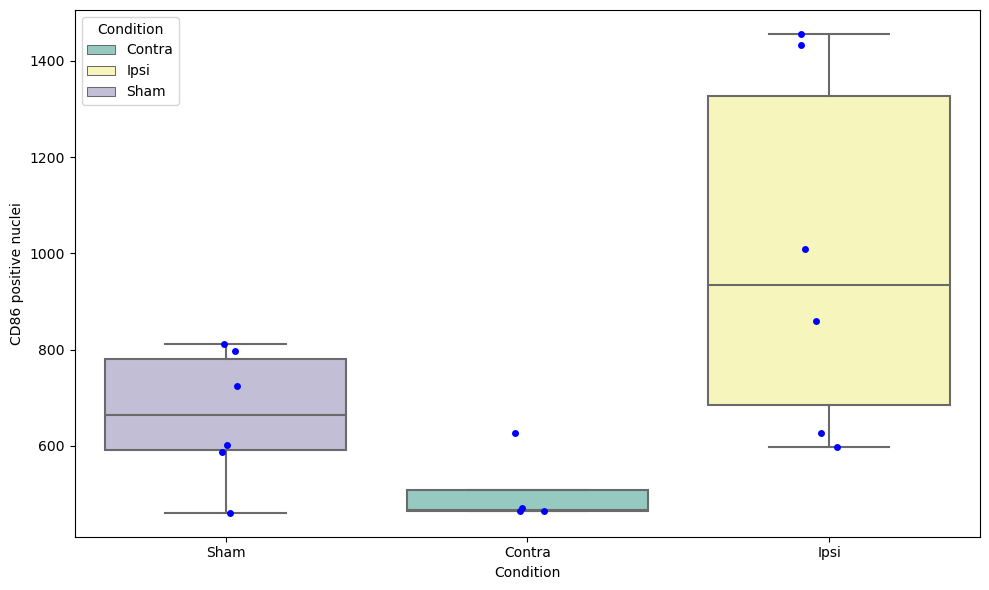

In [6]:

order = ['Sham', 'Contra', 'Ipsi']
plt.figure(figsize=(10, 6))  # Adjust size as needed
sns.boxplot(data=grouped_df, x='Condition', y=1, showfliers=False, order=order, hue='Condition', palette='Set3', dodge=False)
sns.stripplot(data=grouped_df, x='Condition', y=1, order=order, color='Blue', dodge=False)
plt.xlabel('Condition')
plt.ylabel('CD86 positive nuclei')
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

In [52]:
print(grouped_df)

Cluster_Label                                          ImageName Condition   0.0   1.0
0              HI 1 Contralateral Mouse 8 Slide18 G4green Neu...    Contra  6879   464
1              HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi  7753  1009
2              HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi  5726   627
3              HI 2 Contralateral Mouse 9 Slide17 G4green Neu...    Contra  6376   470
4              HI 2 Contralateral Mouse 9 Slide17 G4green Neu...    Contra  6803   464
5              HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...      Ipsi  5586  1456
6              HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...      Ipsi  5225  1434
7              HI 3 Contralateral Mouse 10 Slide18 G4green Ne...    Contra  6154   626
8              HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...      Ipsi  5451   859
9              HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...      Ipsi  5485   597
10             Sham 1 Contralateral Mouse 6

  File "c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\jonasvg\AppData\Local\

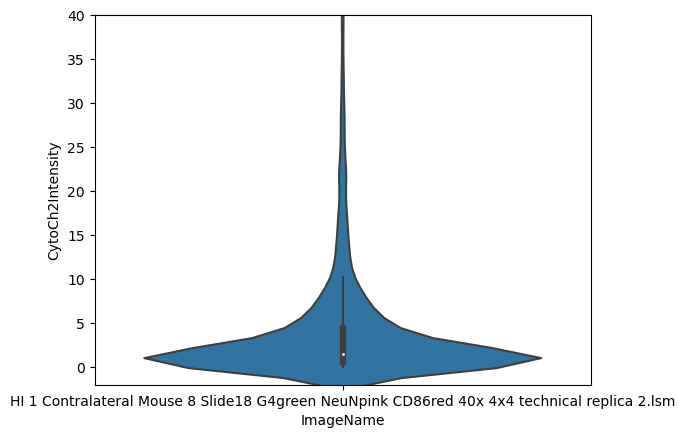

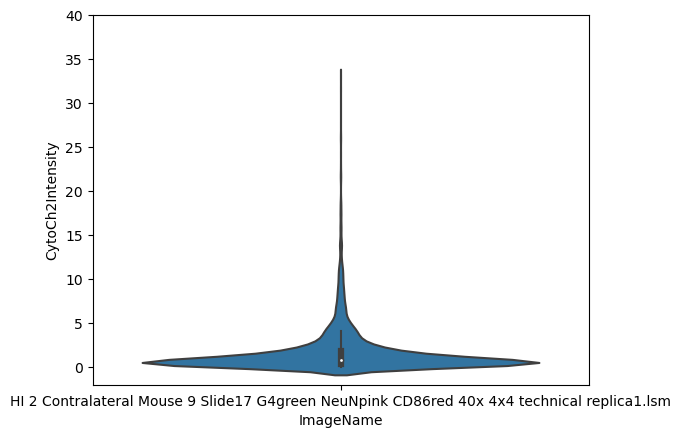

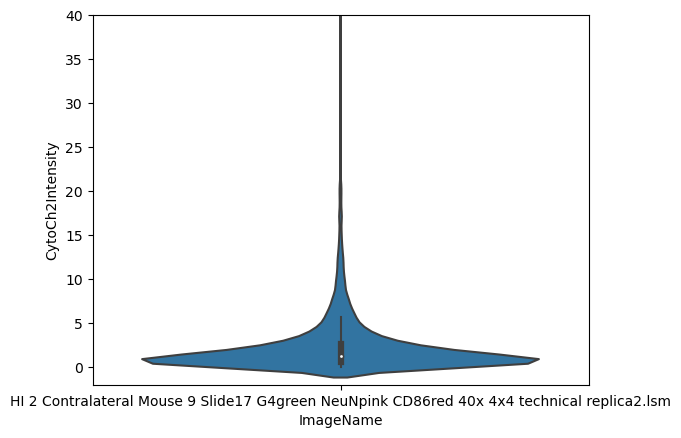

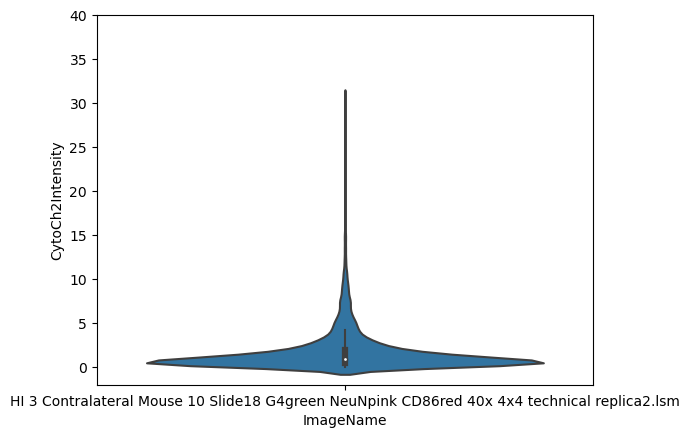

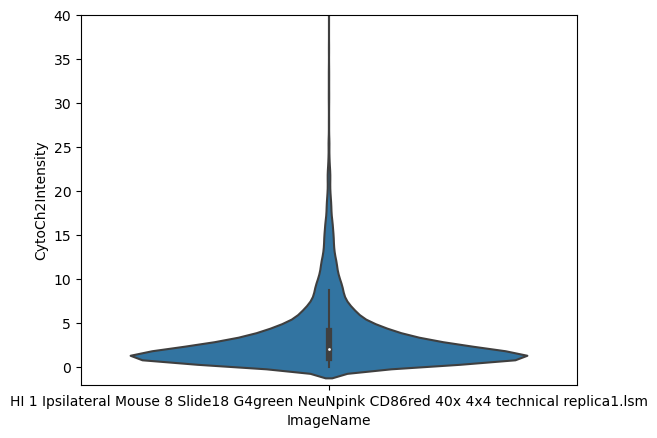

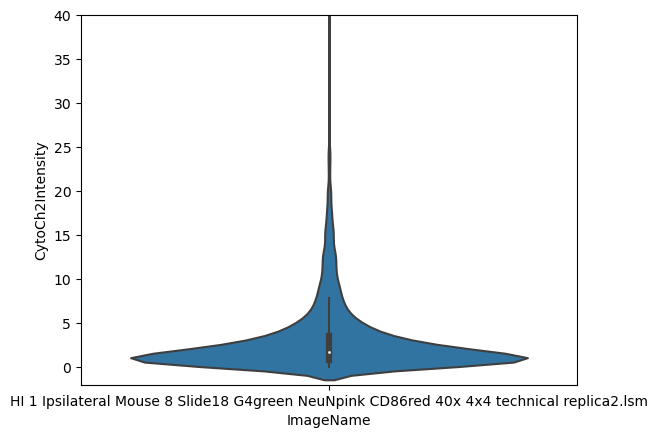

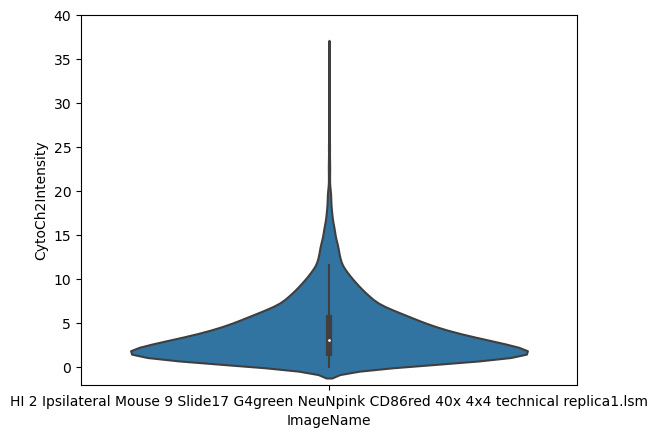

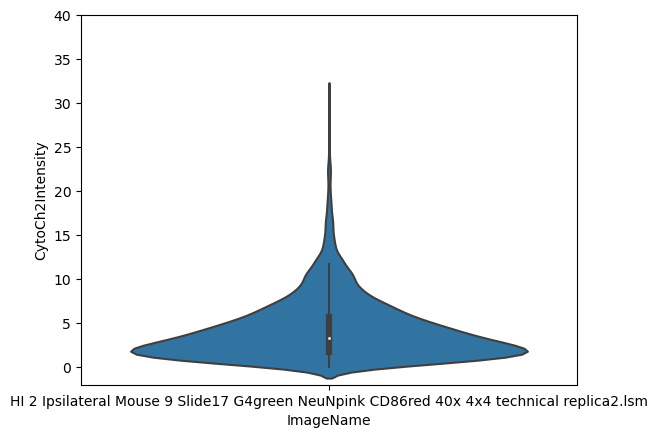

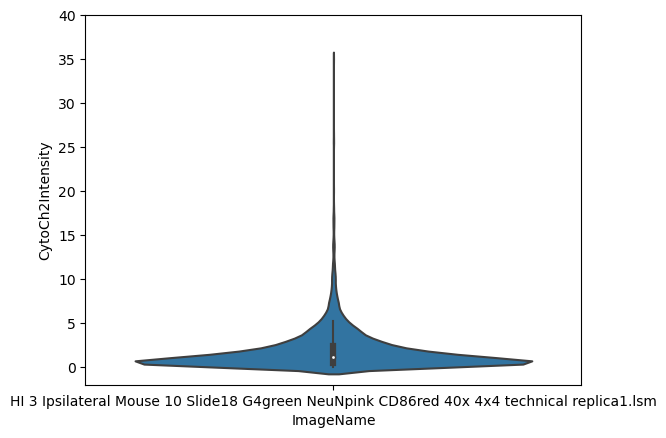

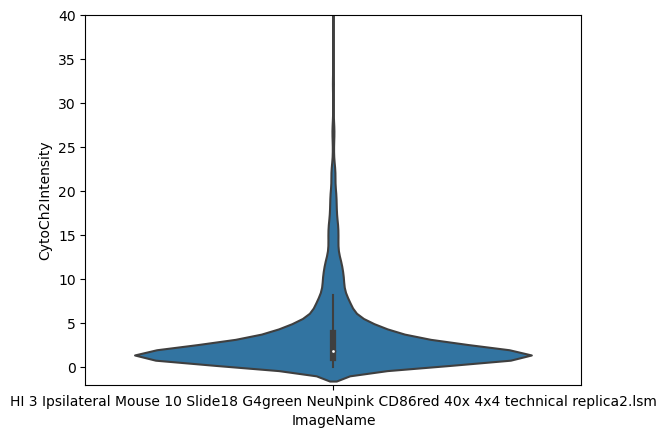

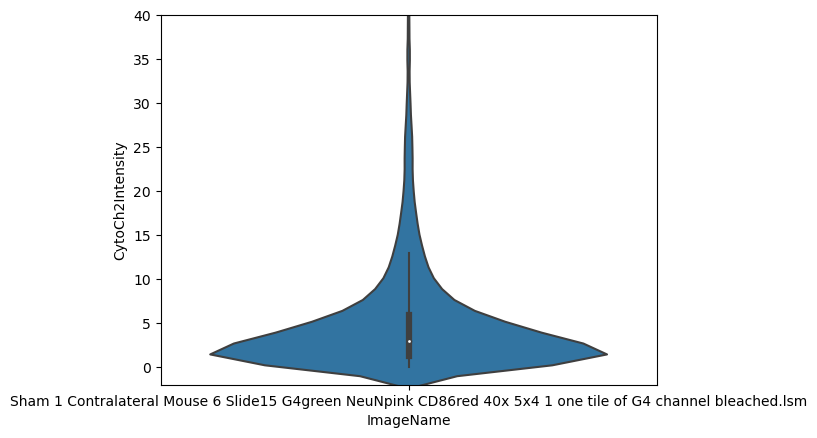

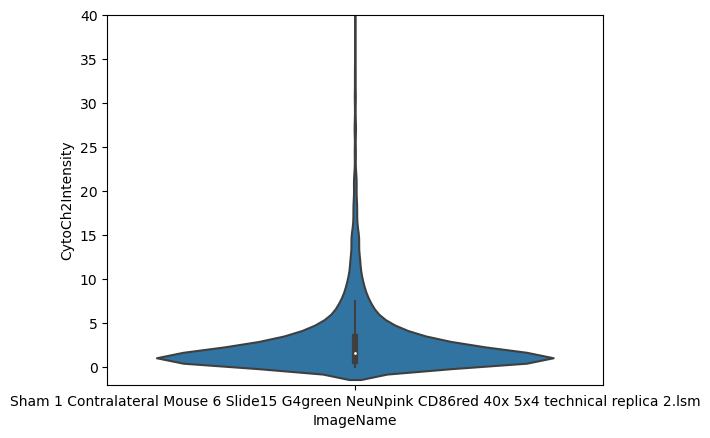

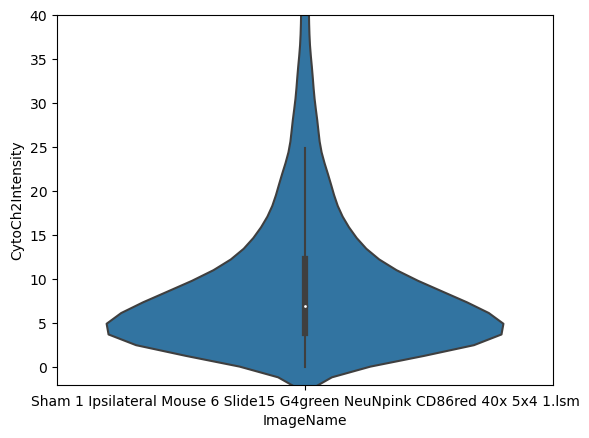

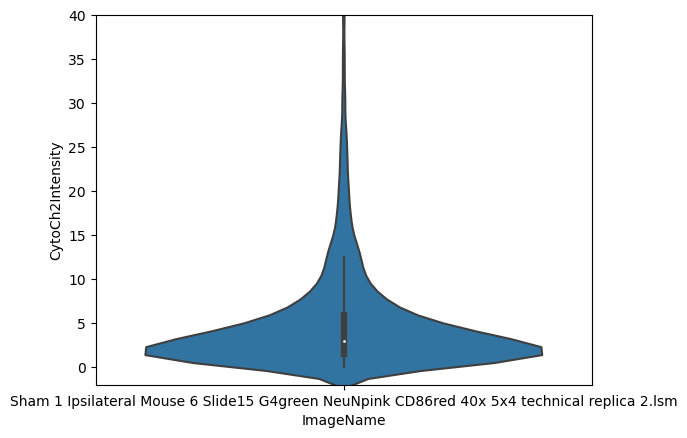

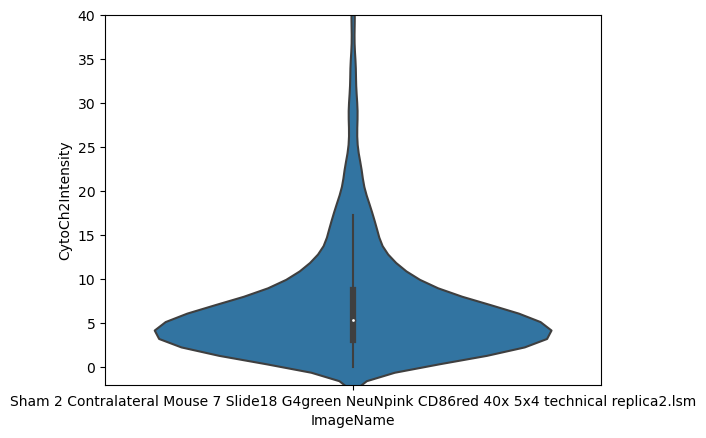

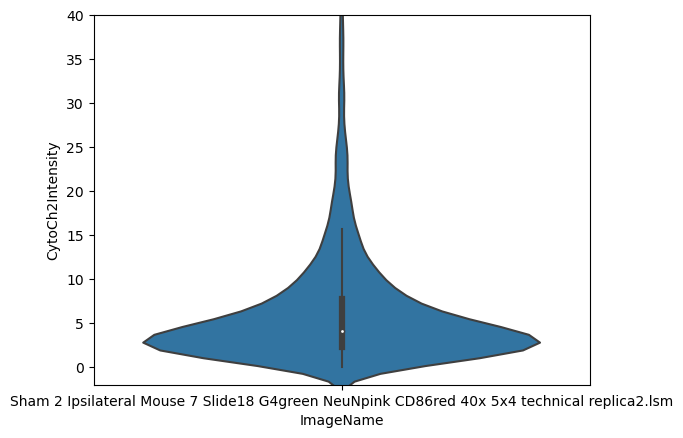

In [7]:
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    sns.violinplot(data=df, x='ImageName', y='CytoCh2Intensity')
    plt.ylim(-2,40)
    plt.show()